In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objs as go
from plotly import tools

In [3]:
%matplotlib inline

In [4]:
path = r'C:\\Users\\pklet\\OneDrive\\Petar\\University Rankings Data_Task 6'

In [5]:
df_spending_per_country = pd.read_csv(os.path.join(path, 'Education_spending_per_countries_with_top_ranking_universities.csv'), index_col = False)

## Hypothesis: The more countries spend (invest) in education, the more universities in that countries will be in the World Top Universitis.

### 2. Data cleaning

In [6]:
df_spending_per_country.columns

Index(['Country', 'Number_of_universies_2016',
       'Total_spending_for_education_2016', 'Number_of_universies_2017',
       'Total_spending_for_education_2017', 'Number_of_universies_2018',
       'Total_spending_for_education_2018', 'Number_of_universies_2019',
       'Total_spending_for_education_2019', 'Number_of_universies_2020',
       'Total_spending_for_education_2020'],
      dtype='object')

In [7]:
df_spending_per_country.head(50)

,Country,Number_of_universies_2016,Total_spending_for_education_2016,Number_of_universies_2017,Total_spending_for_education_2017,Number_of_universies_2018,Total_spending_for_education_2018,Number_of_universies_2019,Total_spending_for_education_2019,Number_of_universies_2020,Total_spending_for_education_2020
0,United States,1176,227441017,1184,205525415,1256,165504643,1376,174577010,1376,149081061
1,United Kingdom,702,23195827,819,28849997,837,35159453,882,34827105,900,34803988
2,Japan,369,17330359,621,26629370,801,38643822,927,45037746,990,41930751
3,Germany,333,12670146,369,12641995,396,15744372,423,17623446,432,18204087
4,Italy,306,5012638,342,6806020,360,7555706,387,7969415,405,7743098
5,Australia,279,2647269,315,4517048,315,2228417,315,2001805,315,2045705
6,Spain,225,3510965,243,1790186,261,2478177,342,5847813,405,7516514
7,France,243,7179924,261,7722981,279,6271892,306,9751353,342,10330891
8,Canada,200,1341412,208,5235073,208,5340535,216,4447414,240,6066336
9,Netherlands,117,738562,117,832619,117,1274422,117,1144857,117,1046277


In [8]:
df_spending_per_country.shape

(37, 11)

##### Missing values

In [9]:
# Check for missing values

df_spending_per_country.isnull().sum()

Country                              0
Number_of_universies_2016            0
Total_spending_for_education_2016    0
Number_of_universies_2017            0
Total_spending_for_education_2017    0
Number_of_universies_2018            0
Total_spending_for_education_2018    0
Number_of_universies_2019            0
Total_spending_for_education_2019    0
Number_of_universies_2020            0
Total_spending_for_education_2020    0
dtype: int64

In [10]:
# Duplicates check
dups = df_spending_per_country.duplicated()

In [11]:
dups.shape # No dups

(37,)

### Extreme values checks

C:\Users\pklet\AppData\Local\Temp\ipykernel_19252\3985856578.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Total_spending_for_education_2020', ylabel='Density'>

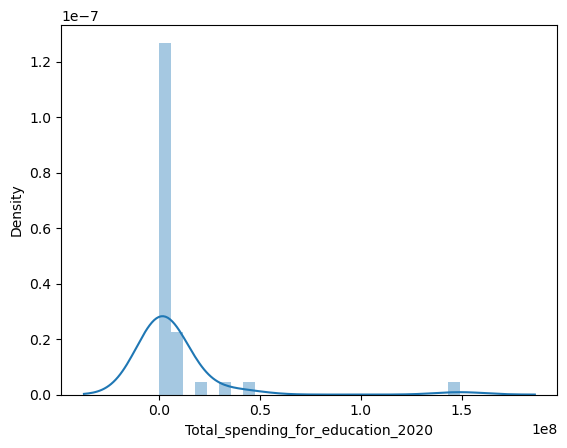

In [12]:
sns.distplot(df_spending_per_country['Total_spending_for_education_2020'], bins=25) # Shows extreme values

#### Some of the outliers in the high values may need to be removed, but let's try without doing so first

In [13]:
df_spending_per_country['Total_spending_for_education_2020'].mean() # Check the mean

8042509.3513513515

In [14]:
df_spending_per_country['Total_spending_for_education_2020'].median() # Check the median

252026.0

In [15]:
df_spending_per_country['Total_spending_for_education_2020'].max() # Check the max

149081061

### 3. Data prep for regression analysis

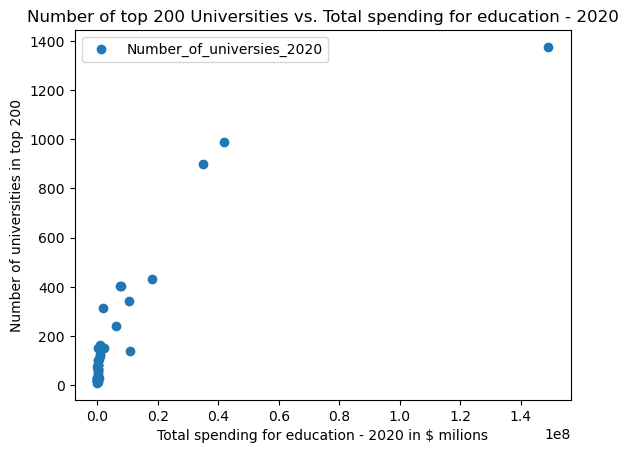

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_spending_per_country.plot(x = 'Total_spending_for_education_2020', y='Number_of_universies_2020',  style='o') 
plt.title('Number of top 200 Universities vs. Total spending for education - 2020')
plt.xlabel('Total spending for education - 2020 in $ milions')
plt.ylabel('Number of universities in top 200')
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_spending_per_country['Total_spending_for_education_2020'].values.reshape(-1,1)
y = df_spending_per_country['Number_of_universies_2020'].values.reshape(-1,1)

In [18]:
X

array([[149081061],
       [ 34803988],
       [ 41930751],
       [ 18204087],
       [  7743098],
       [  2045705],
       [  7516514],
       [ 10330891],
       [  6066336],
       [  1046277],
       [   369493],
       [  1016917],
       [  2069058],
       [  1014869],
       [ 10711945],
       [   604860],
       [   123054],
       [   237190],
       [   373310],
       [   238499],
       [   252026],
       [   160751],
       [   216124],
       [    44641],
       [   160192],
       [   121816],
       [    23742],
       [   228170],
       [   519806],
       [    11773],
       [    23235],
       [    13823],
       [     7023],
       [     4614],
       [    17641],
       [     4524],
       [   235042]], dtype=int64)

In [19]:
y

array([[1376],
       [ 900],
       [ 990],
       [ 432],
       [ 405],
       [ 315],
       [ 405],
       [ 342],
       [ 240],
       [ 117],
       [ 153],
       [ 162],
       [ 153],
       [ 126],
       [ 138],
       [ 108],
       [  81],
       [  81],
       [ 104],
       [  99],
       [  64],
       [  64],
       [  63],
       [  72],
       [  54],
       [  81],
       [  22],
       [  45],
       [  30],
       [  27],
       [  27],
       [  18],
       [  27],
       [  18],
       [  18],
       [   9],
       [  12]], dtype=int64)

In [20]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

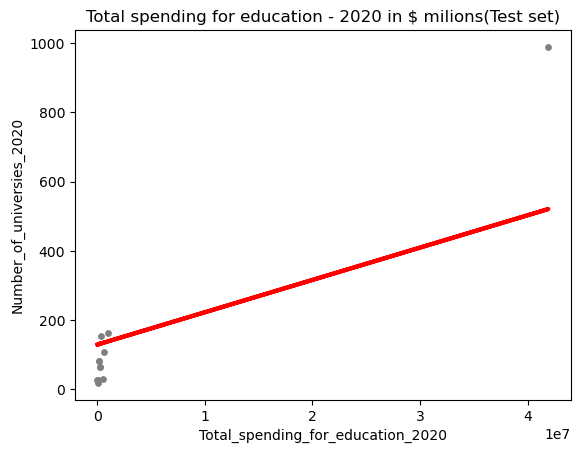

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total spending for education - 2020 in $ milions(Test set)')
plot_test.xlabel('Total_spending_for_education_2020')
plot_test.ylabel('Number_of_universies_2020')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error.
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.35072961e-06]]
Mean squared error:  23285.118681288626
R2 score:  0.6481213705480647


In [27]:
y_predicted

array([[130.58570639],
       [130.92141628],
       [129.71543398],
       [132.01981844],
       [128.69404444],
       [133.42535466],
       [134.22067161],
       [138.0737052 ],
       [520.64790418],
       [129.70385778],
       [128.78205351],
       [128.63045948]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,63,130.585706
1,64,130.921416
2,81,129.715434
3,153,132.019818
4,18,128.694044
5,30,133.425355
6,108,134.220672
7,162,138.073705
8,990,520.647904
9,81,129.703858


### Compare how the regression fits the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)

r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.35072961e-06]]
Mean squared error:  19017.064271996518
R2 score:  0.7989367951530828


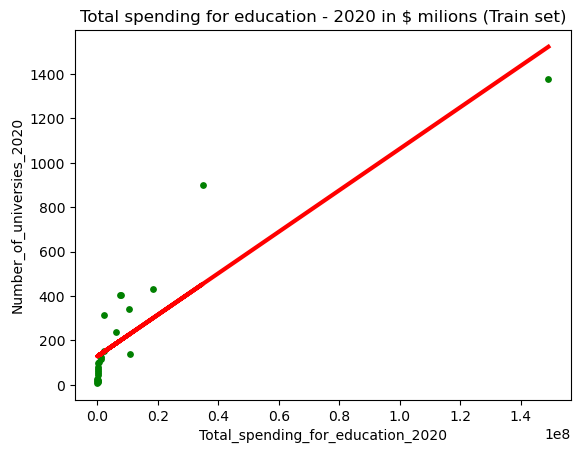

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total spending for education - 2020 in $ milions (Train set)')
plot_test.xlabel('Total_spending_for_education_2020')
plot_test.ylabel('Number_of_universies_2020')
plot_test.show()

### Removing outliers

In [33]:
# Clean the extreme values from the "Total_spending_for_education_2020" variable observed during the consistency checks.

df_test = df_spending_per_country[df_spending_per_country['Total_spending_for_education_2020'] <=100000000]

In [35]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'D. metro', y='Price per unit', style='o')
plt.title('Distance to metro vs Price per unit')
plt.xlabel('D. metro') 
plt.ylabel('Price per unit')  
plt.show()

KeyError: 'D. metro'

In [ ]:
df_test.plot(x = 'Total_spending_for_education_2020', y='Number_of_universies_2020',  style='o') 
plt.title('Number of top 200 Universities vs. Total spending for education - 2020')
plt.xlabel('Total spending for education - 2020 in $ milions')
plt.ylabel('Number of universities in top 200')
plt.show()

In [ ]:
# Reshape again.

X_2 = df_test['Total_spending_for_education_2020'].values.reshape(-1,1)
y_2 = df_test['Number_of_universies_2020'].values.reshape(-1,1)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [ ]:
# Run and fit the regression.

regression = LinearRegression() 
regression.fit(X_train_2, y_train_2)

In [ ]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [ ]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [ ]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

In [ ]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

In [ ]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

## Conclution: The regression analysis  show us that we can confirm the stated hypothesis, that more spending in education by countries will reflect in better universities ranking in world.